In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [9]:
ds = pd.read_csv(r"C:\Users\botla\Downloads\winequality-red.csv")

In [10]:
ds.head()
#inspect(few top)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
ds.sample()
#random row inspect

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1548,11.2,0.4,0.5,2.0,0.099,19.0,50.0,0.99783,3.1,0.58,10.4,5


In [12]:
ds.columns
#dataset columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
ds.describe()
#statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
ds.info()
#missing count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
print(ds.shape)

(1599, 12)


In [17]:
ds['quality'].value_counts()
#occurances 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

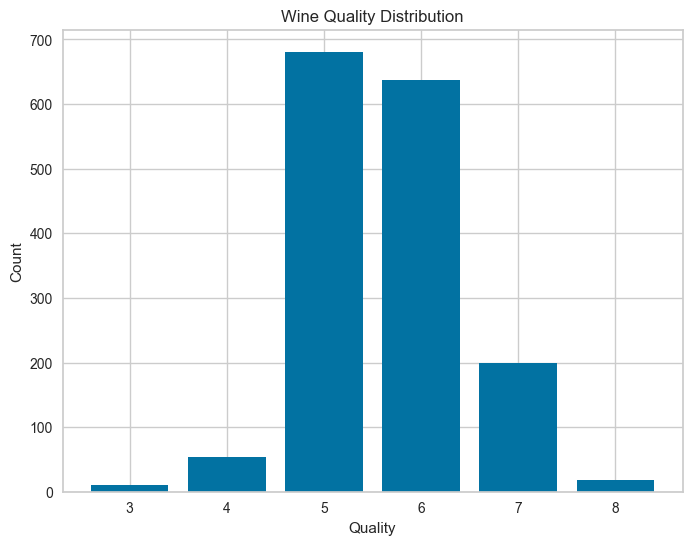

In [18]:
import matplotlib.pyplot as plt

ds_new = ds['quality'].value_counts()
labels = ds_new.index.tolist()
counts = ds_new.tolist()

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


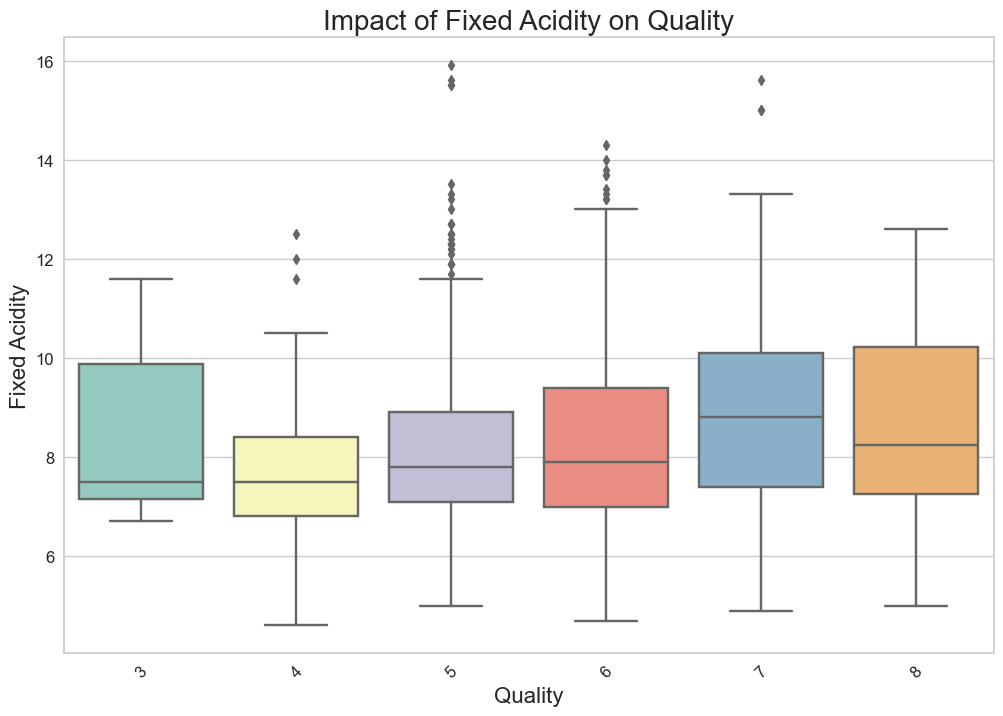

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size to 12x8 inches
plt.figure(figsize=(12, 8))

# Generate a boxplot of fixed acidity vs quality using the dataset 'ds'
sns.boxplot(x='quality', y='fixed acidity', data=ds, palette='Set3')

# Rotate x-axis tick labels by 45 degrees and set fontsize to 12
plt.xticks(rotation=45, fontsize=12)

# Set y-axis tick label fontsize to 12
plt.yticks(fontsize=12)

# Set plot title with fontsize of 20
plt.title("Impact of Fixed Acidity on Quality", fontsize=20)

# Set x-axis label with fontsize of 16
plt.xlabel('Quality', fontsize=16)

# Set y-axis label with fontsize of 16
plt.ylabel('Fixed Acidity', fontsize=16)

# Display the plot
plt.show()


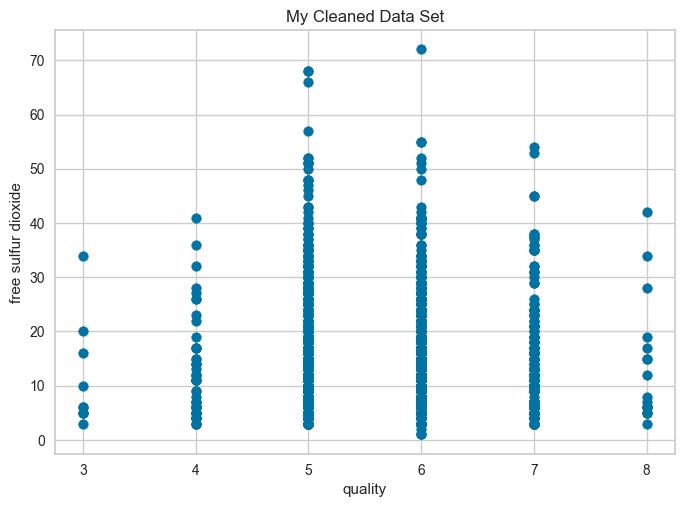

In [20]:

# create a scatter plot
plt.scatter(ds['quality'], ds['free sulfur dioxide'])
plt.title('My Cleaned Data Set')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()


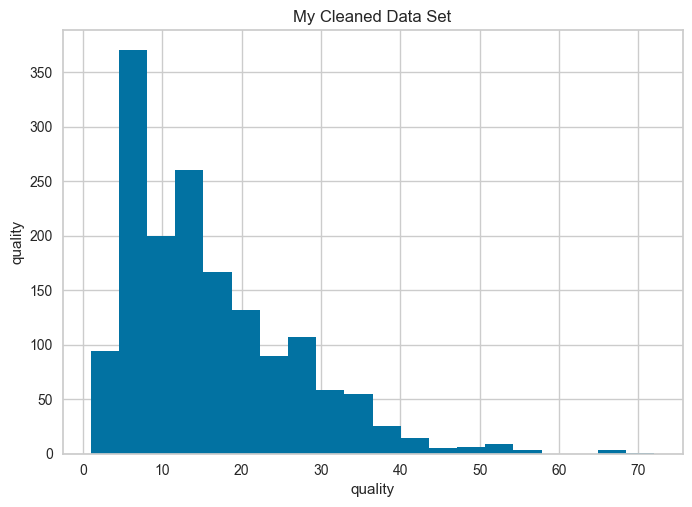

In [21]:


# create a histogram
plt.hist(ds['free sulfur dioxide'], bins=20)
plt.title('My Cleaned Data Set')
plt.xlabel('quality')
plt.ylabel('quality')
plt.show()


In [22]:
ds['Good'] =ds['quality'].apply(lambda x : 1 if(x>5) else 0)
ds.drop(['quality'],inplace=True,axis=1)

In [23]:
ds['Good'].value_counts()

1    855
0    744
Name: Good, dtype: int64

In [24]:

fig = px.scatter(ds, x='alcohol', y='residual sugar', color='Good')
fig.update_layout(
    title={
        'text': "PLOT - A",
        'font': {'size': 30}
    },
    xaxis_title="Alcohol",
    yaxis_title="Residual Sugar",
    font=dict(
        size=12,
    ),
)
fig.show()


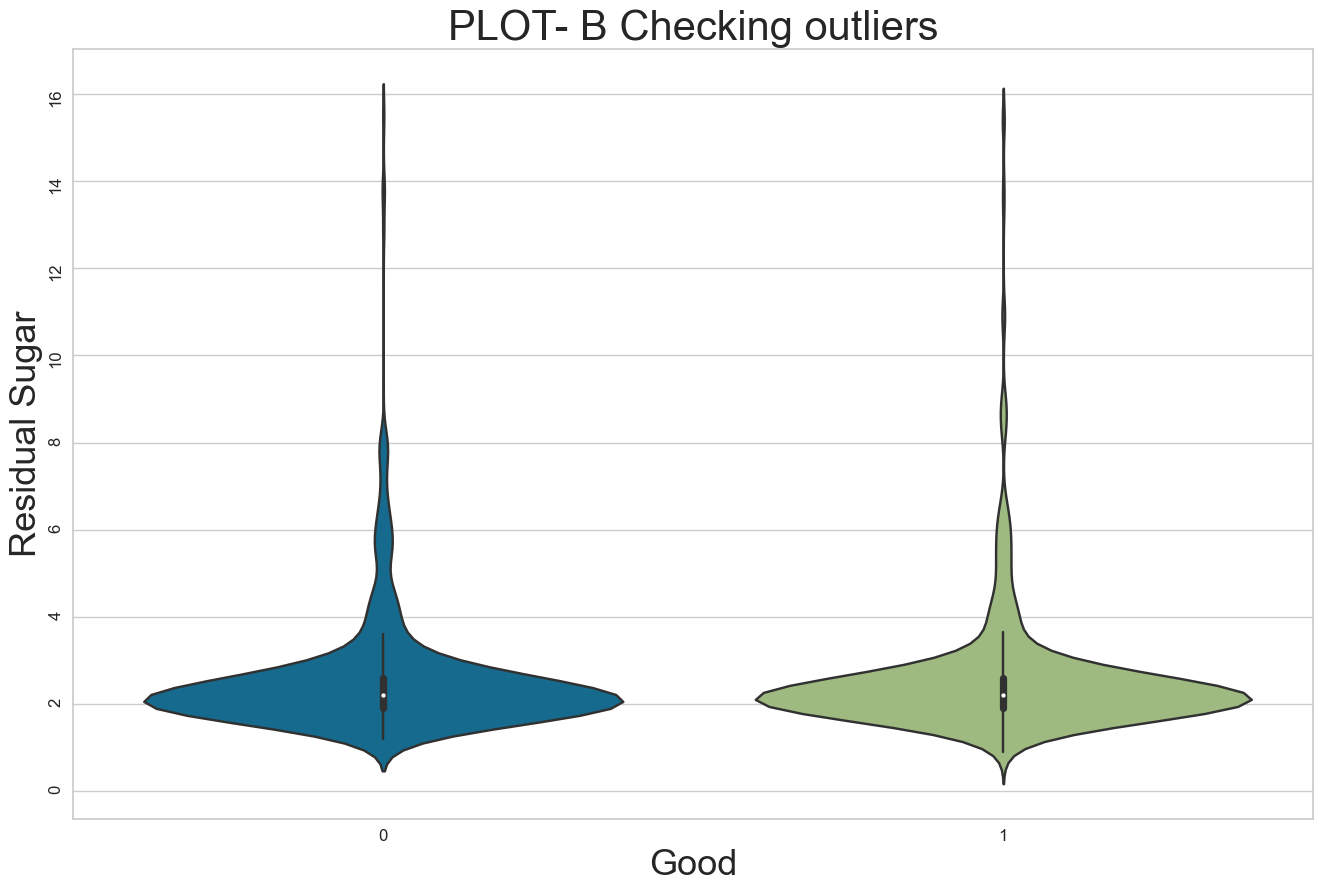

In [25]:
plt.figure(figsize=(16,10))
sns.violinplot(x='Good',y='residual sugar',data=ds)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- B Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('Residual Sugar',fontsize=26)
plt.show()


C:\Users\botla\AppData\Local\Temp\ipykernel_18900\321725522.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



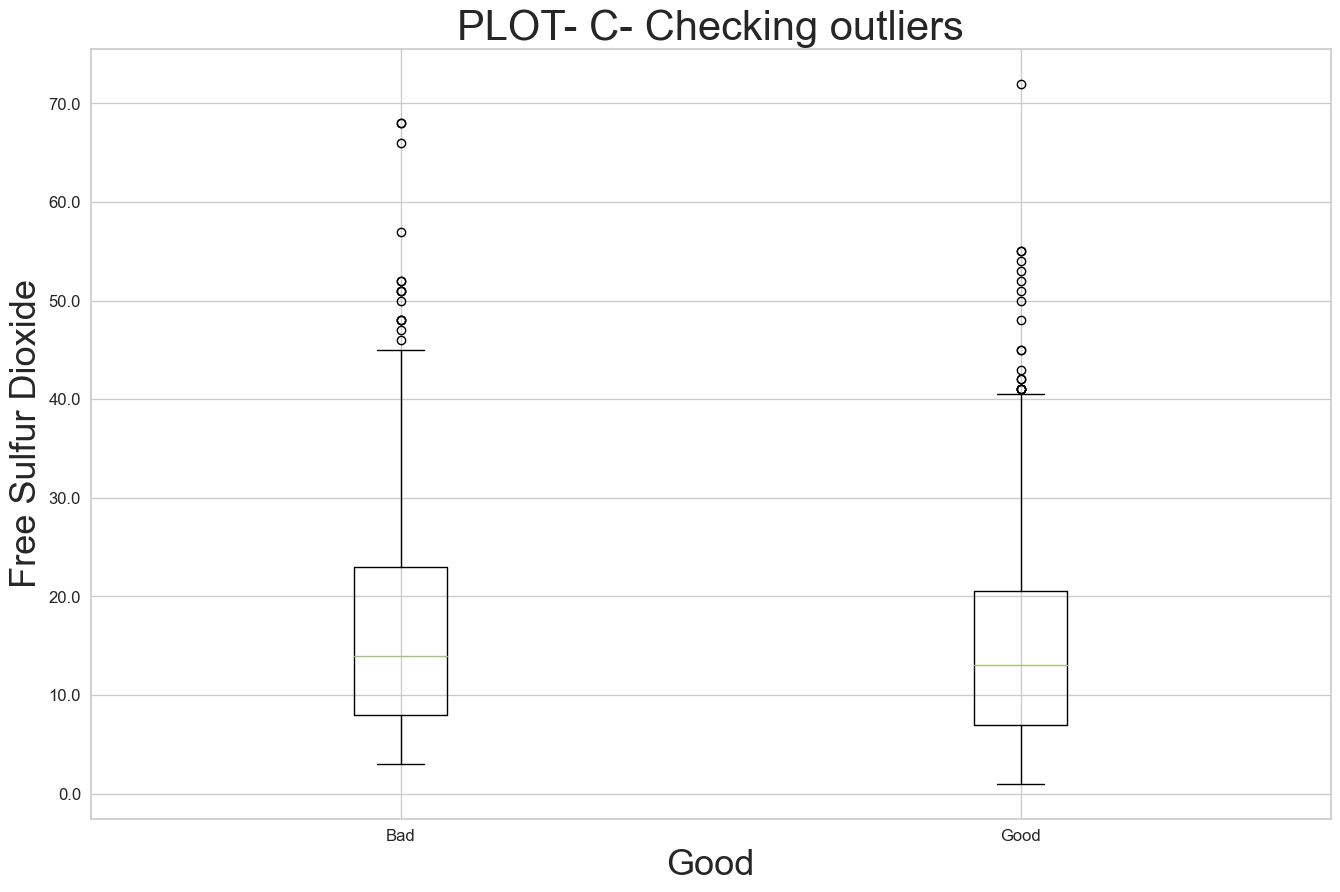

In [26]:

fig, axs = plt.subplots(figsize=(16,10))
axs.boxplot([ds.loc[ds['Good']==0, 'free sulfur dioxide'], ds.loc[ds['Good']==1, 'free sulfur dioxide']])
axs.set_xticklabels(['Bad', 'Good'], fontsize=12)
axs.set_yticklabels(axs.get_yticks(), fontsize=12)
axs.set_title("PLOT- C- Checking outliers", fontsize=30)
axs.set_xlabel('Good', fontsize=26)
axs.set_ylabel('Free Sulfur Dioxide', fontsize=26)
plt.show()
#based on devided quality

In [27]:
ds.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [28]:

fig = px.histogram(ds, x="fixed_acidity", nbins=10, color_discrete_sequence=["#CA96EC"], marginal="box", title="Distribution of 'fixed_acidity'")
fig.update_layout(height=500, width=800)
fig.show()

fig = px.histogram(ds, x="volatile_acidity", nbins=10, color_discrete_sequence=["#A163CF"], marginal="box", title="Distribution of 'volatile_acidity'")
fig.update_layout(height=500, width=800)
fig.show()

fig = px.histogram(ds, x="citric_acid", nbins=10, color_discrete_sequence=["#29066B"], marginal="box", title="Distribution of 'citric_acid'")
fig.update_layout(height=500, width=800)
fig.show()


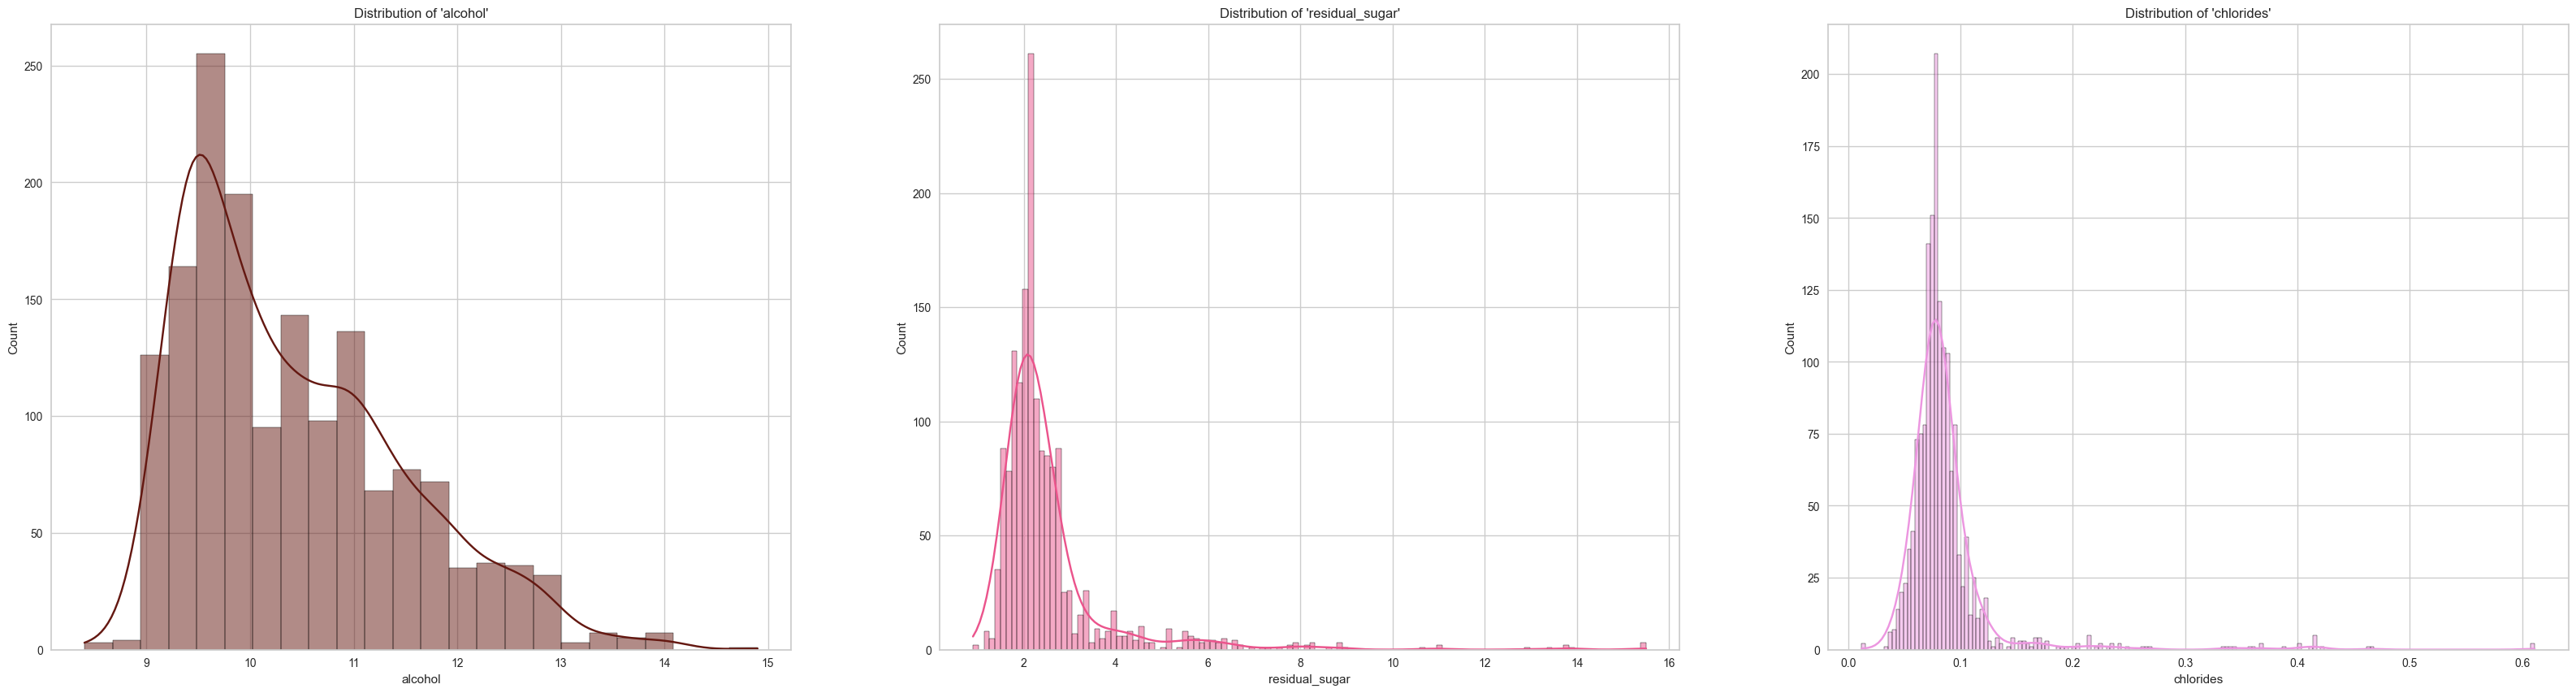

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax=axes[0], data=ds, x="alcohol", kde=True, color="#641811")
axes[0].set(title="Distribution of 'alcohol'", ylabel="Count")

sns.histplot(ax=axes[1], data=ds, x="residual_sugar", kde=True, color="#EB548C")
axes[1].set(title="Distribution of 'residual_sugar'", ylabel="Count")

sns.histplot(ax=axes[2], data=ds, x="chlorides", kde=True, color="#EC96E0")
axes[2].set(title="Distribution of 'chlorides'", ylabel="Count")

plt.show()


In [30]:
X = ds.drop(['Good'],axis=1)
Y = ds['Good']
del ds
#performing data preparation for ml: x=i/p(train_independent) y=o/p(evaluation_dependent)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 90)
#devide train & tests (train machine learning model on new, unseen data)

In [32]:
# Define the random grid of hyperparameters to search over
n_estimators_list = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features_list = ['auto', 'sqrt']
criterion_list = ['gini', 'entropy']
max_depth_list = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth_list.append(None)
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]
bootstrap_list = [True, False]

random_grid = {'n_estimators': n_estimators_list,
               'max_features': max_features_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list,
               'bootstrap': bootstrap_list}
#defining leafs,nodes,trees using variables

In [45]:
# Create an instance of a random forest classifier
rf_tune = RandomForestClassifier()

# Define the hyperparameter search space using a random grid
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(start=10, stop=110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomizedSearchCV object to search over the hyperparameters
rf_random = RandomizedSearchCV(estimator=rf_tune,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
rf_random.fit(X_train, Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': True}

c:\Users\botla\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



<Axes: title={'center': 'RandomizedSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

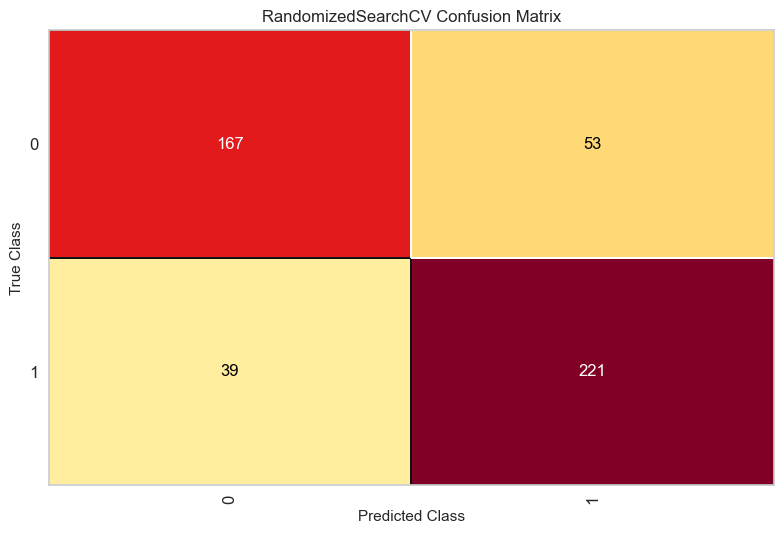

In [35]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf_random, classes=[0, 1], label_encoder={0: 'no', 1: 'yes'})
cm.score(X_test, Y_test)
cm.show(outpath="confusion_matrix.png")


In [46]:
Y_pred = rf_random.predict(X_test)

In [47]:
accuracy_score(Y_test,Y_pred)

0.8083333333333333

In [48]:
f1_score(Y_test,Y_pred)
#accuracy based on formula

0.8277153558052434

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [41]:
print("**************************************************************")

print("Best score for train set: " + str(knn_cv_model.best_score_))

print("**************************************************************")

print("The Best K_value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nThe Best weights: " + knn_cv_model.best_params_["weights"],
     "\nThe Best leaf_size: " + str(knn_cv_model.best_params_["leaf_size"]))

**************************************************************
Best score for train set: 0.7283059845559846
**************************************************************
The Best K_value: 24 
The Best weights: distance 
The Best leaf_size: 25


In [42]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=24, weights='distance')

In [43]:
Y_pred = knn_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.76875

In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       220
           1       0.78      0.80      0.79       260

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

